In [2]:
! pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
transform=transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))]
)

In [8]:
train_dataset=torchvision.datasets.FashionMNIST('./data',
                                  download=True,
                                  train=True,
                                  transform=transform)
test_dataset=torchvision.datasets.FashionMNIST('./data',
                                  download=True,
                                  train=False,
                                  transform=transform)

100%|██████████████████████████████████████████████████████████████████| 26421880/26421880 [00:35<00:00, 734587.38it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 140817.62it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:13<00:00, 336845.08it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 10218777.56it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [9]:
len(train_dataset)

60000

In [10]:
train_loader=torch.utils.data.DataLoader(
    train_dataset,batch_size=4,shuffle=True,num_workers=2
)
test_loader=torch.utils.data.DataLoader(
    test_dataset,batch_size=4,shuffle=False,num_workers=2
)

In [62]:
for data,target in train_loader:
    example=data
    break

In [12]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [54]:
def matplotlib_imshow(img,one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 1.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg,cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        

Image size is:  torch.Size([1, 28, 28])


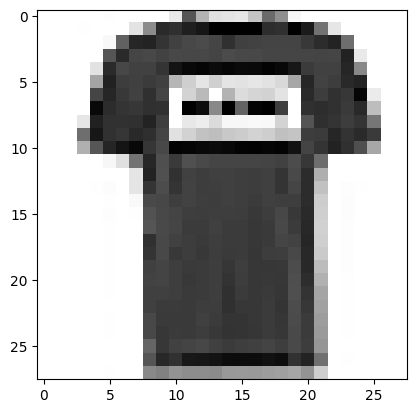

In [57]:
train_example=train_dataset[1][0]
print("Image size is:",train_example.shape)
matplotlib_imshow(train_example,one_channel=True)

In [78]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,5)#shape->[in_channels,out_channels,kernel_size]
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)

        self.fc1=nn.Linear(16*4*4,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self,x):
        #x->[batch_size,channels,height,width]->[4,1,28,28]
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        # first convolutional layer shape is torch.Size([4, 6, 24, 24])
        # first pooling layer shape is torch.Size([4, 6, 12, 12])
        # second convolutional layer shape is torch.Size([4, 16, 8, 8])
        # second pooling layer shape is torch.Size([4, 16, 4, 4])
        
        x = x.view(-1, 16 * 4 * 4)#x->[4,256]
        x = F.relu(self.fc1(x))#x->[4,120]
        x = F.relu(self.fc2(x))#x->[4,84]
        x = self.fc3(x)#x->[4,10]

        return x
        
        

In [80]:
nn_model=Model()
# nn_model(example)

In [82]:
nn_model.parameters

<bound method Module.parameters of Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [59]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(nn_model.parameters(),lr=0.001,momentum=0.9)

torch.Size([24])

In [89]:
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter('runs/fashion_mnist_experiment_1')

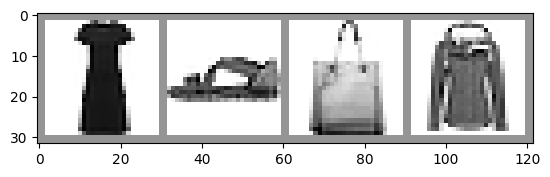

In [86]:
dataiter=iter(train_loader)#generator
images,labels=next(dataiter)
img_grid=torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid,one_channel=True)

In [90]:
writer.add_image('four_fashion_mnist_images', img_grid)

In [ ]:
# tensorboard --logdir=runs

In [92]:
writer.add_graph(nn_model,images)
writer.close()

torch.Size([4, 256])
torch.Size([4, 120])
torch.Size([4, 84])
torch.Size([4, 10])
torch.Size([4, 256])
torch.Size([4, 120])
torch.Size([4, 84])
torch.Size([4, 10])
torch.Size([4, 256])
torch.Size([4, 120])
torch.Size([4, 84])
torch.Size([4, 10])


In [118]:
def n_random(data,target,n=10):
    assert len(data)==len(target)
    perm=torch.randperm(len(data))
    print(perm)
    return data[:n],target[:n]
images,labels=n_random(train_dataset.data,train_dataset.targets)
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()


tensor([43798,  2469, 35315,  ..., 58118, 13793, 58367])
